Amy Heger - Machine Learning Sample Code

In [226]:
#Load libraries

library(tidyverse) 
library(dplyr)
#library(car) #diagnostics
library(corrplot) 
library(MASS) 
library(glmnet) #regularization
library(leaps) #subset selection
library(scatterplot3d) #multivar visualization
library(class) #KNN
library(cluster) #K-means
library(rpart) #or tree
library(randomForest) 
library(gbm) #boosting
library(e1071) #SVM
library(pls) #PCR & PLSR
library(nnet) #neural networks
library(IRdisplay) 

In [227]:
#Load and review data

setwd ("/Users/amyheger/Dropbox/Jobs/Online Courses/Trainings/Kaggle")
work = read.csv("HR-Employee-Attrition.csv", header= TRUE)

dim(work)
display(head(work))
str(work)
summary(work)


[1] 1470   35

,X...Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


'data.frame':	1470 obs. of  35 variables:
 $ X...Age                 : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 6

    X...Age      Attrition            BusinessTravel   DailyRate     
 Min.   :18.00   No :1233   Non-Travel       : 150   Min.   : 102.0  
 1st Qu.:30.00   Yes: 237   Travel_Frequently: 277   1st Qu.: 465.0  
 Median :36.00              Travel_Rarely    :1043   Median : 802.0  
 Mean   :36.92                                       Mean   : 802.5  
 3rd Qu.:43.00                                       3rd Qu.:1157.0  
 Max.   :60.00                                       Max.   :1499.0  
                                                                     
                  Department  DistanceFromHome   Education    
 Human Resources       : 63   Min.   : 1.000   Min.   :1.000  
 Research & Development:961   1st Qu.: 2.000   1st Qu.:2.000  
 Sales                 :446   Median : 7.000   Median :3.000  
                              Mean   : 9.193   Mean   :2.913  
                              3rd Qu.:14.000   3rd Qu.:4.000  
                              Max.   :29.000   Max.   :5.000  

In [228]:
#Remove variables that contribute no information
  workcut = work[,-c(9,10,22,27)] #delete EmployeeCount(all =1), EmployeeNumber(just ID), Over18(all Y), StandardHour (all 80)                      
    #display(head(workcut))
    #work = na.omit(work)

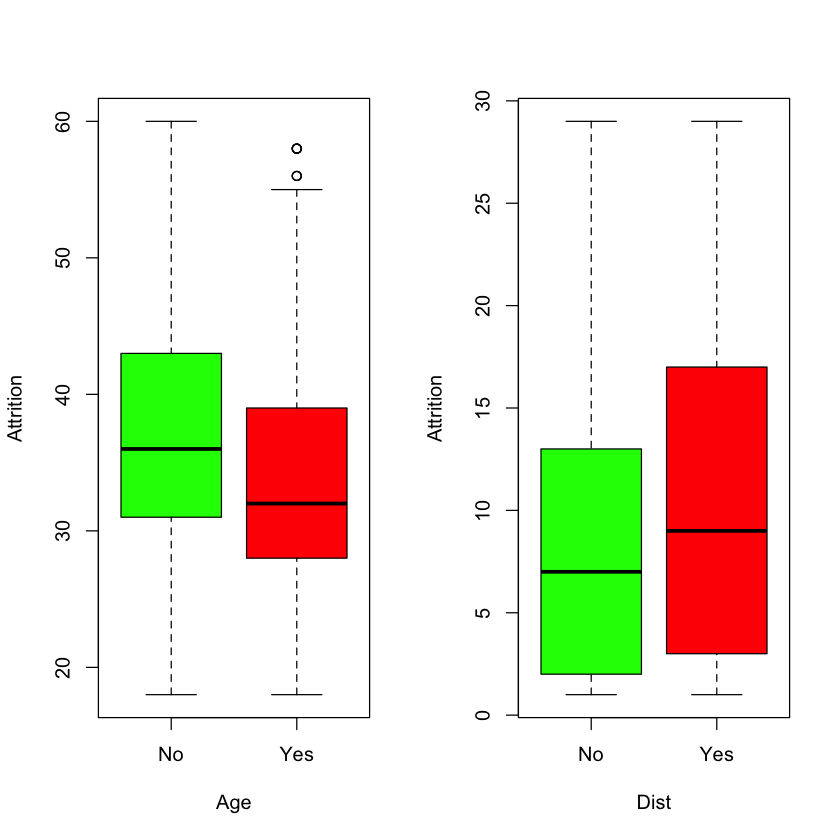

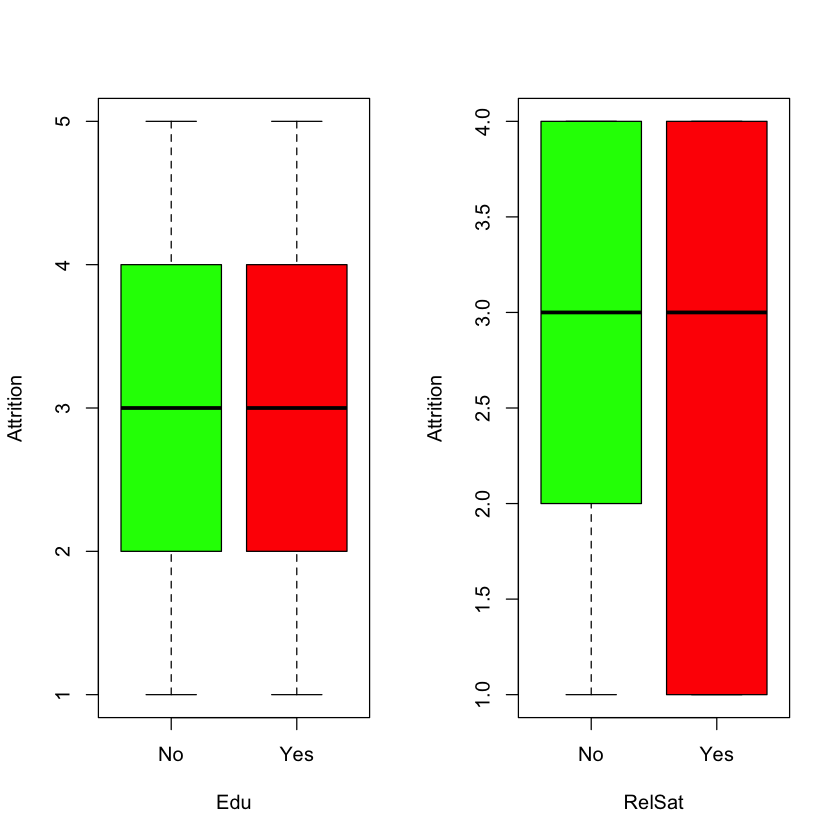

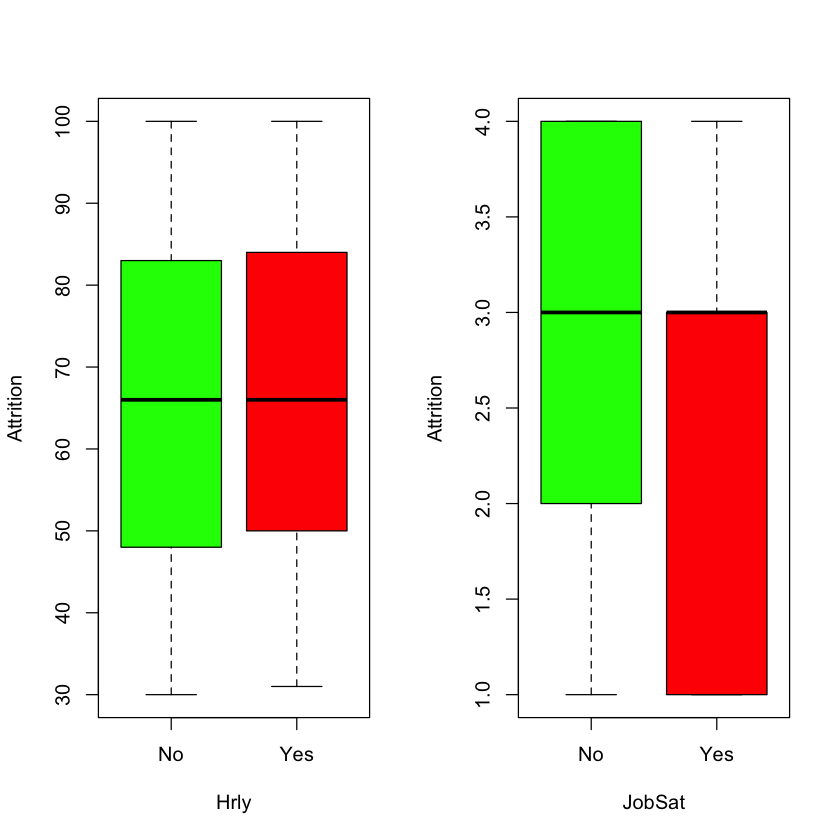

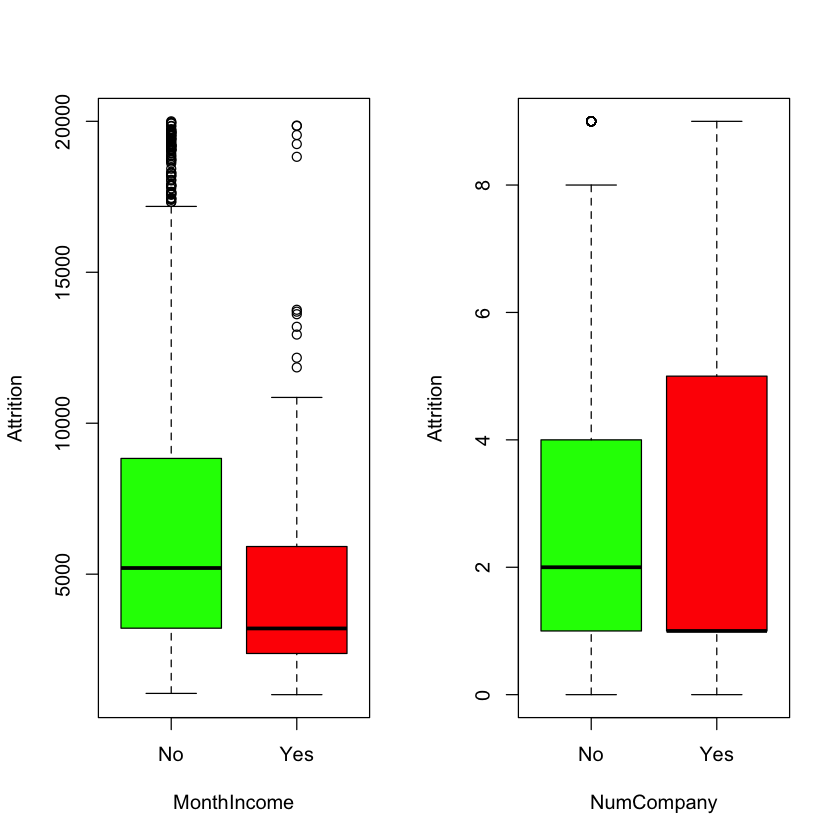

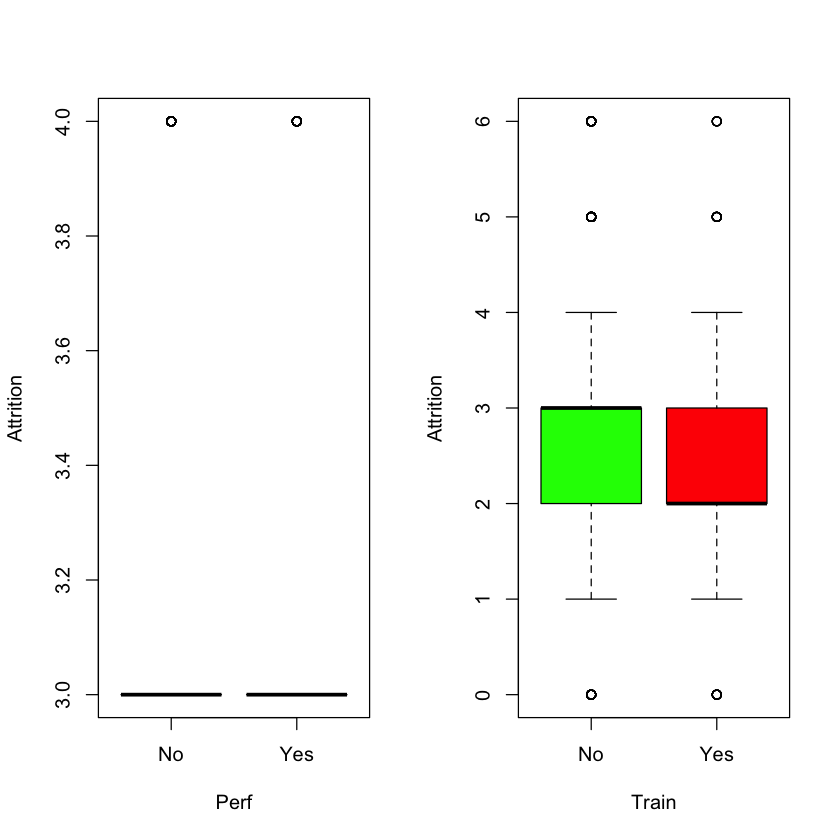

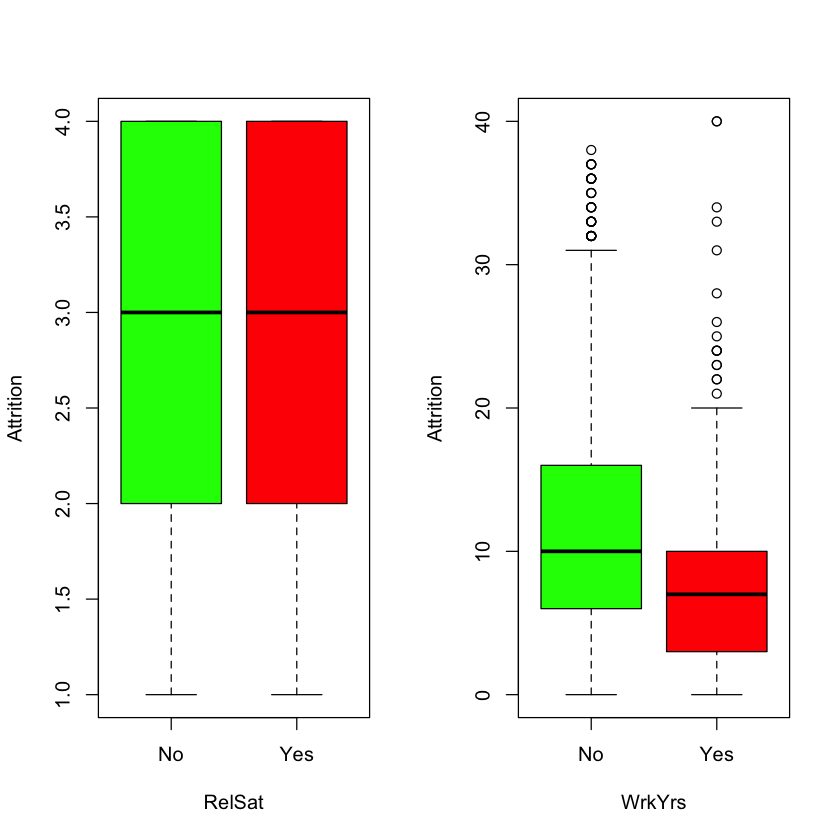

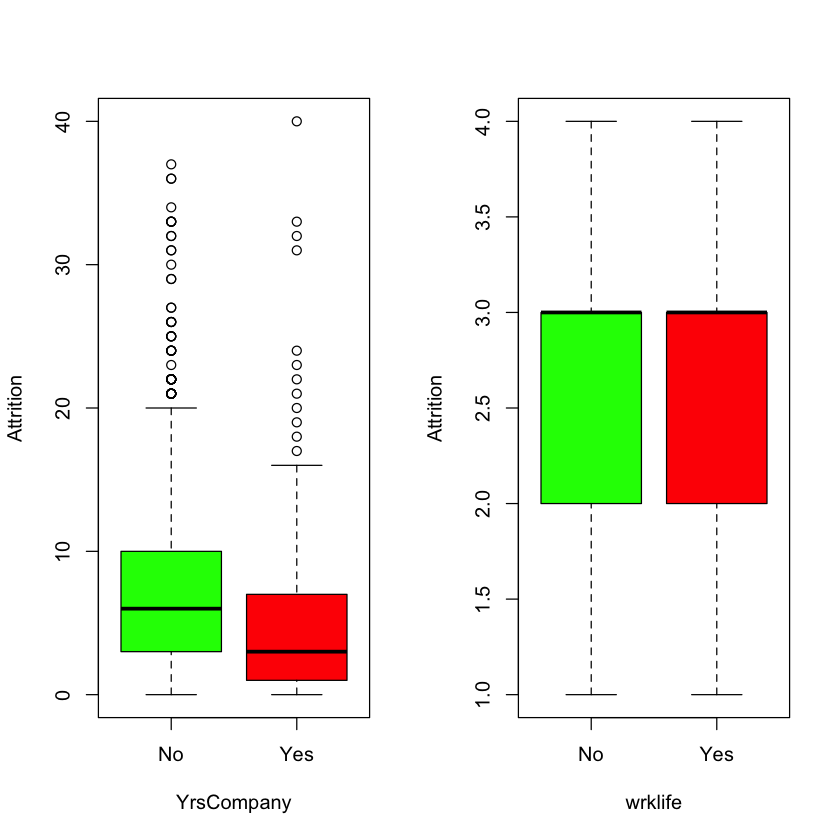

In [229]:
par(mfrow=c(1,2))
boxplot(X...Age~Attrition, data=workcut, xlab = "Age", ylab="Attrition", col = c("green","red"))
boxplot(DistanceFromHome~Attrition, data=workcut, xlab = "Dist", ylab="Attrition", col = c("green","red"))
boxplot(Education~Attrition, data=workcut, xlab = "Edu", ylab="Attrition", col = c("green","red"))
boxplot(EnvironmentSatisfaction~Attrition, data=workcut, xlab = "RelSat", ylab="Attrition",col = c("green","red"))
boxplot(HourlyRate~Attrition, data=workcut, xlab = "Hrly", ylab="Attrition", col = c("green","red"))
boxplot(JobSatisfaction~Attrition, data=workcut, xlab = "JobSat", ylab="Attrition", col = c("green","red"))
boxplot(MonthlyIncome~Attrition, data=workcut, xlab = "MonthIncome", ylab="Attrition", col = c("green","red"))
boxplot(NumCompaniesWorked~Attrition, data=workcut, xlab = "NumCompany", ylab="Attrition", col = c("green","red"))
boxplot(PerformanceRating~Attrition, data=workcut, xlab = "Perf", ylab="Attrition", col = c("green","red")) #Lacks variablity 
boxplot(TrainingTimesLastYear~Attrition, data=workcut, xlab = "Train", ylab="Attrition", col = c("green","red"))
boxplot(RelationshipSatisfaction~Attrition, data=workcut, xlab = "RelSat", ylab="Attrition",col = c("green","red"))
boxplot(TotalWorkingYears~Attrition, data=workcut, xlab = "WrkYrs", ylab="Attrition", col = c("green","red"))
boxplot(YearsAtCompany~Attrition, data=workcut, xlab = "YrsCompany", ylab="Attrition", col = c("green","red"))
boxplot(WorkLifeBalance~Attrition, data=workcut, xlab = "wrklife", ylab="Attrition", col = c("green","red"))

,X...Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,⋯,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
X...Age,1.00,0.01,0.00,0.21,0.01,0.02,0.03,0.51,0.00,0.50,⋯,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,⋯,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,0.00,0.00,1.00,0.02,-0.02,0.03,0.01,0.01,0.00,-0.02,⋯,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,⋯,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,⋯,-0.03,0.01,0.00,0.00,-0.02,0.03,0.00,0.02,0.02,0.00
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,⋯,0.00,0.00,0.05,0.00,-0.01,0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,⋯,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,0.00,0.95,⋯,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,0.00,0.03,0.00,-0.01,-0.01,-0.07,-0.02,0.00,1.00,-0.01,⋯,0.00,-0.01,0.01,-0.02,-0.01,-0.02,0.00,0.00,-0.02,-0.03
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,⋯,-0.02,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34


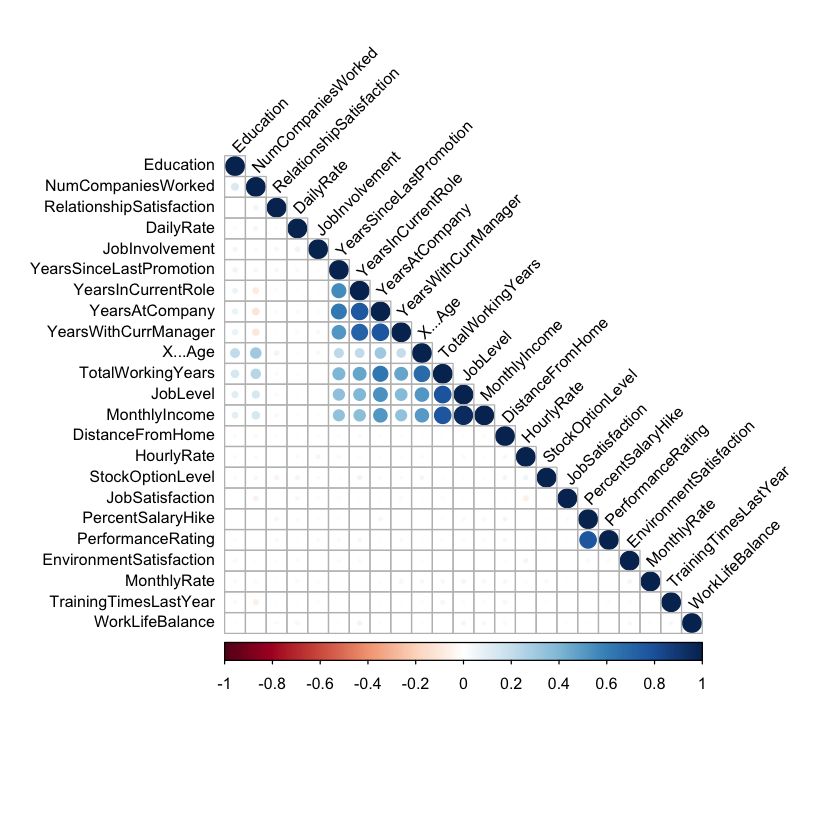

In [230]:
#Remove categorical variables to check for multicolinearity
  workcutnum = as.matrix(workcut[,-c(2,3,5,8,10,14,16,20)]) 
    #typeof(workcutnum)
    #display(head(workcutnum))


  corcut = round(cor(workcutnum),2)
  corcut
  corwrk = corrplot(corcut, method="circle", type = "lower", order = "hclust", 
         tl.col = "black", tl.cex =.8, tl.srt = 45)
  #Joblevel with MonthlyIncome(.95) & TotalWorkingYears (.78)
  #Age corr with TotalWorkingYears (r=.68), JobLevel (.51), & MonthlyIncome (.50)
  #Yearsatcompany with YearsWithCurrentManager (.77), YearsInCurrentRole (.76) and YearsSincePromotion (.62)


In [231]:
#Remove features that reflect overlapping information
workselect = workcut[,-c(13,29,30,31)] #JobLevel, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
   #display(head(workselect))

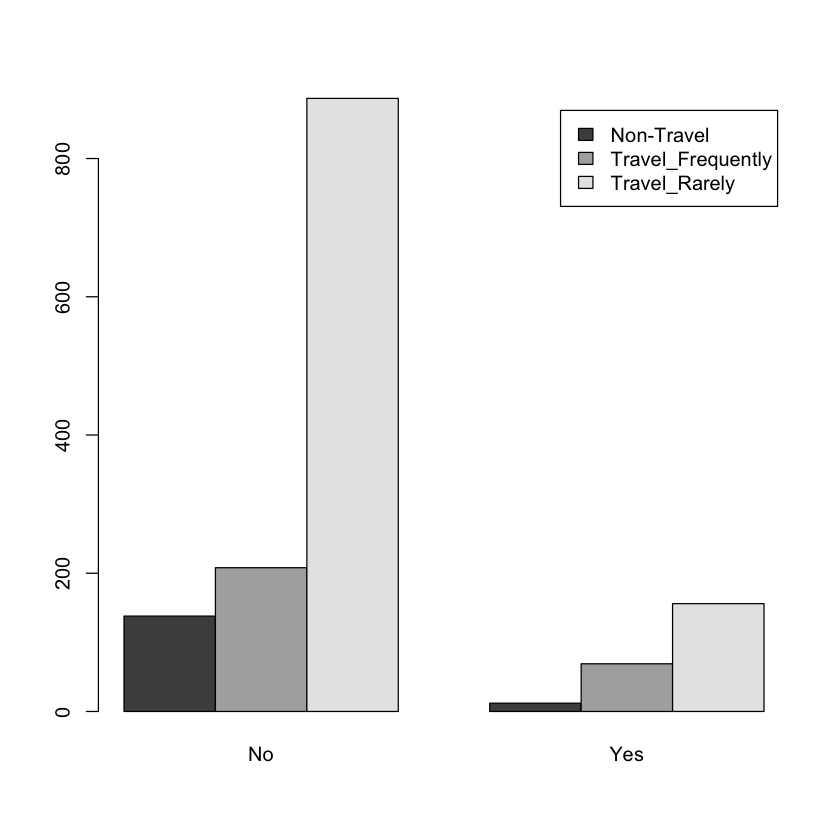

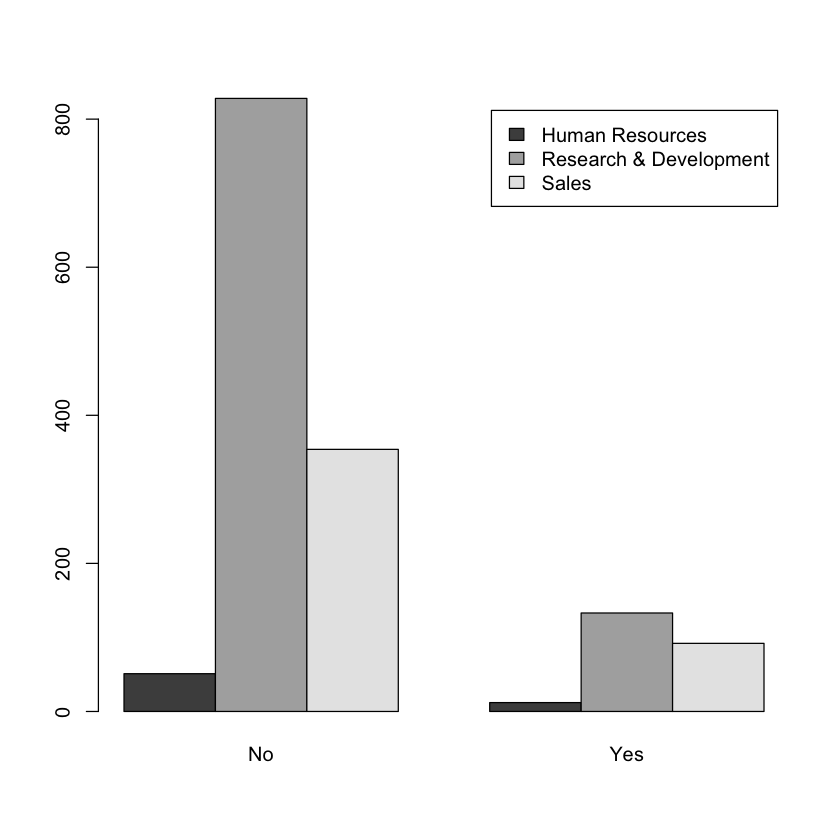

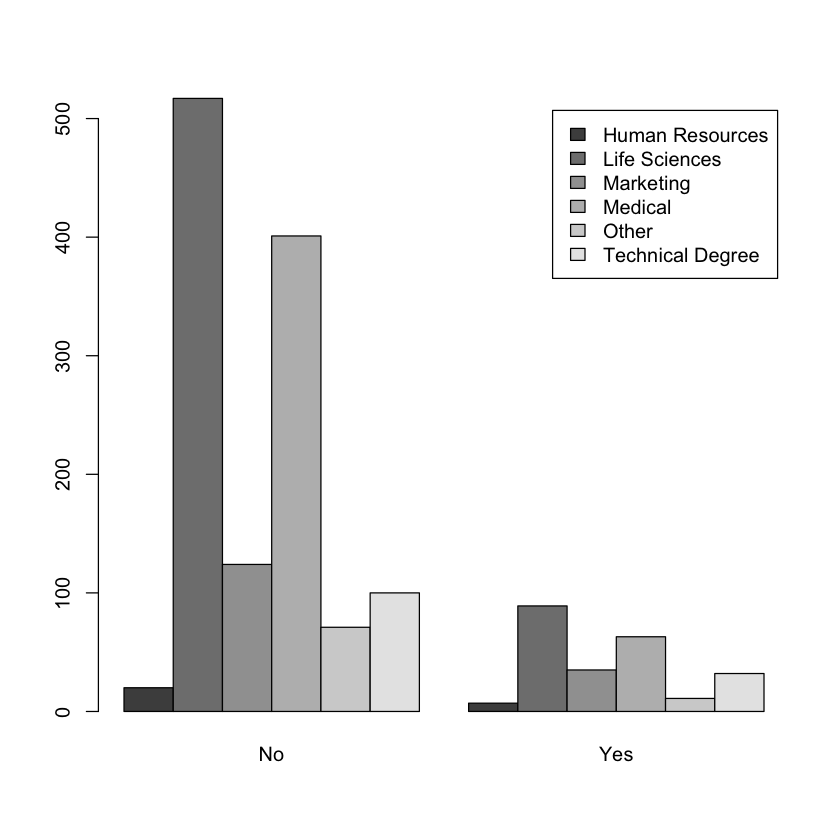

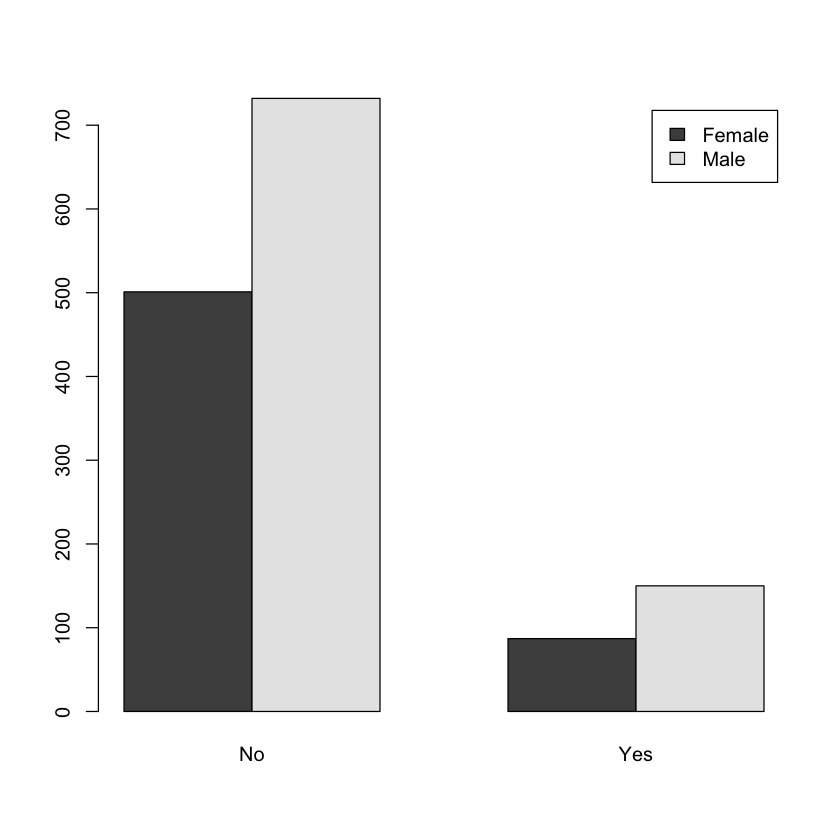

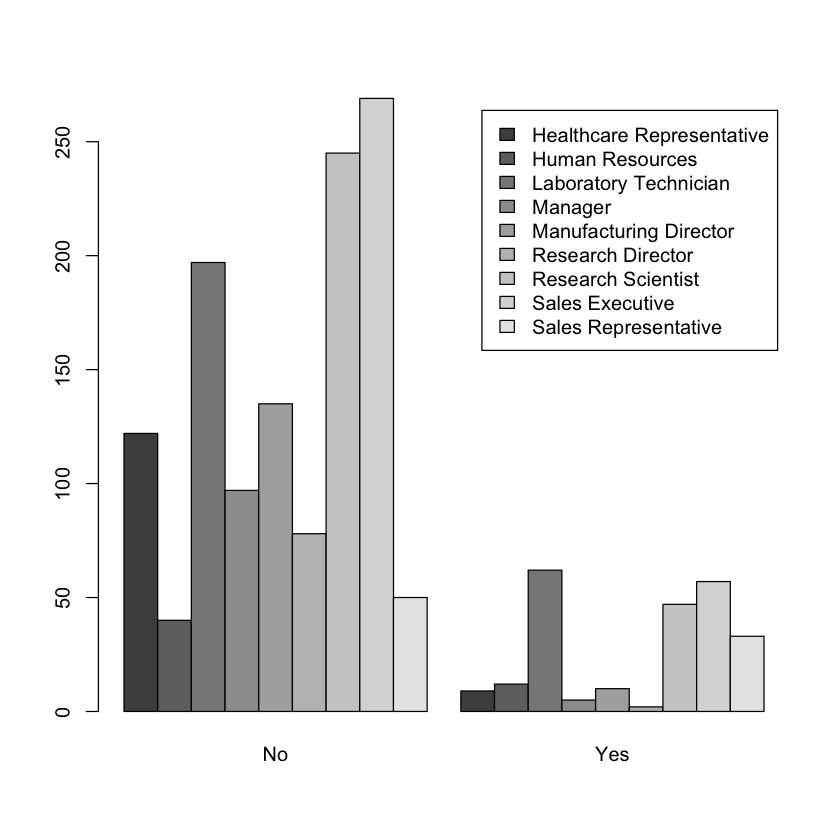

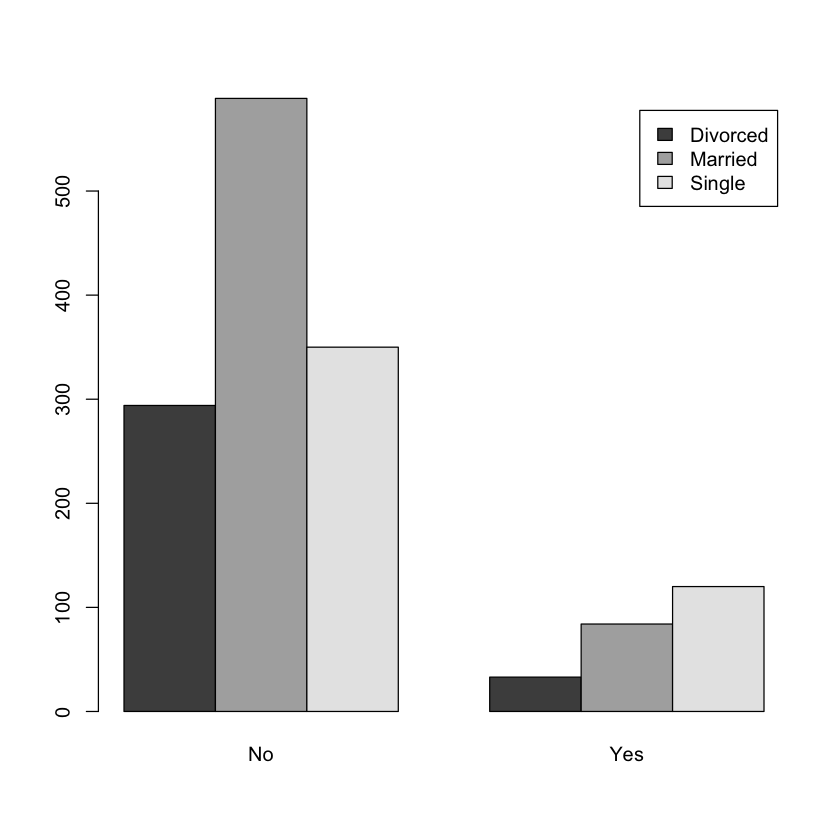

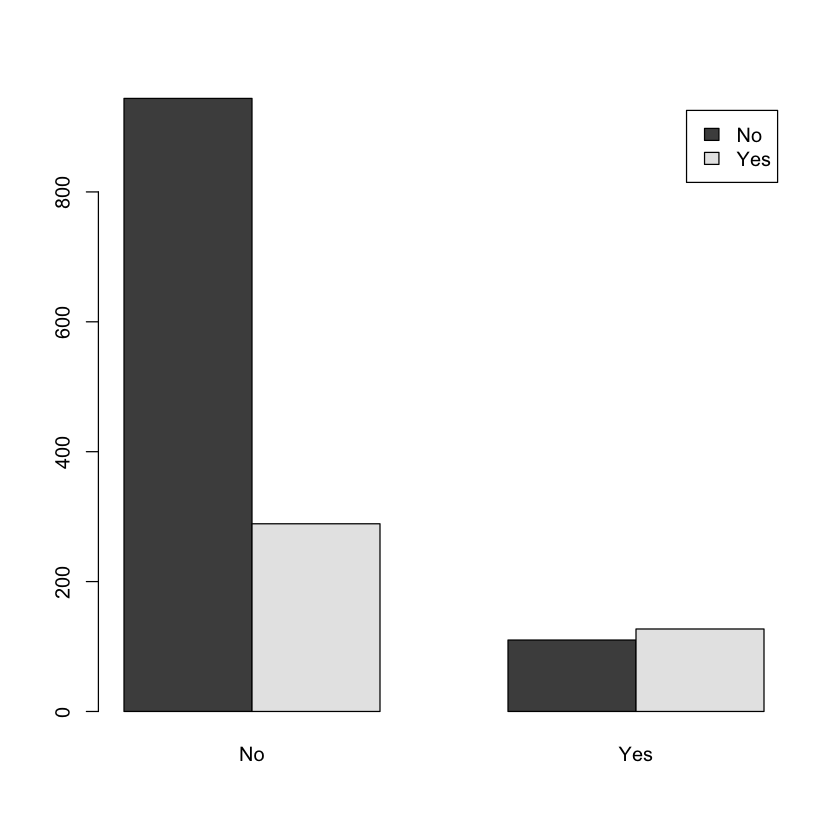

In [232]:
bartable = table(workselect$BusinessTravel, workselect$Att) 
barplot(bartable, beside = TRUE, legend = levels(unique(workselect$BusinessTravel)))
bartable = table(workselect$Department, workselect$Att) 
barplot(bartable, beside = TRUE, legend = levels(unique(workselect$Department)))
bartable = table(workselect$EducationField, workselect$Att) 
barplot(bartable, beside = TRUE, legend = levels(unique(workselect$EducationField)))
bartable = table(workselect$Gender, workselect$Att) 
barplot(bartable, beside = TRUE, legend = levels(unique(workselect$Gender)))
bartable = table(workselect$JobRole, workselect$Att) 
barplot(bartable, beside = TRUE, legend = levels(unique(workselect$JobRole)))
bartable = table(workselect$MaritalStatus, workselect$Att) 
barplot(bartable, beside = TRUE, legend = levels(unique(workselect$MaritalStatus)))
bartable = table(workselect$OverTime, workselect$Att) 
barplot(bartable, beside = TRUE, legend = levels(unique(workselect$OverTime)))


In [234]:
gender.tabs = table(workselect$Attrition,workselect$Gender)
gender.tabs = prop.table(gender.tabs, 2)
travel.tabs = table(workselect$Attrition,workselect$BusinessTravel)
travel.tabs = prop.table(travel.tabs, 2)
dept.tabs = table(workselect$Attrition,workselect$Department)
dept.tabs = prop.table(dept.tabs, 2)
edu.tabs = table(workselect$Attrition,workselect$EducationField)
edu.tabs = prop.table(edu.tabs, 2)
role.tabs = table(workselect$Attrition,workselect$JobRole)
role.tabs = prop.table(role.tabs, 2)
ot.tabs = table(workselect$Attrition,workselect$OverTime)
ot.tabs = prop.table(ot.tabs, 2)
marital.tabs = table(workselect$Attrition,workselect$MaritalStatus)
marital.tabs = prop.table(marital.tabs, 2)

con.table = t(round(cbind(travel.tabs,gender.tabs,dept.tabs,edu.tabs,role.tabs,ot.tabs,marital.tabs),2))
#row.names(con.table) = c("female=0","male=1","=1","chest=2","chest=3","fastingbs=0","fastingbs=colnames(con.table) = c("HD=0","HD=1")
con.table



,No,Yes
Non-Travel,0.92,0.08
Travel_Frequently,0.75,0.25
Travel_Rarely,0.85,0.15
Female,0.85,0.15
Male,0.83,0.17
Human Resources,0.81,0.19
Research & Development,0.86,0.14
Sales,0.79,0.21
Human Resources,0.74,0.26
Life Sciences,0.85,0.15


In [235]:
#dim(workselect)
wrk_design = workselect[1:1470,-1]
prop = 0.7 #train on 70% of data

#Create predictors and Attrition outcome 
set.seed(3)
Y = as.factor(wrk_design[,1]) 
X = as.matrix(wrk_design[,-1])
rep = 20

  train.mis.lr = train.mis.lasso = train.mis.svc = train.mis.svm = rep(0,rep)
  test.mis.lr = test.mis.lasso = test.mis.svc = test.mis.svm = rep(0,rep)

In [ ]:
for(i in 1:rep)
  {
 
  train_index = sample(1:nrow(wrk_design),prop*nrow(wrk_design),replace = FALSE)
  #train_index = sample(1:1470,441,replace = FALSE)
  ytest= workselect[-train_index,2]
    
  train_X= X[train_index,]
  train_Y= Y[train_index]
  
  test_X = X[-train_index,]
  test_Y = Y[-train_index]
  
  train_data = data.frame(train_X, train_Y)
  test_data = data.frame(test_X, test_Y)


# logistic regression
  lr.att = glm(test_Y~., data = train_data[-2], family = "binomial", maxit=50)
  #summary(lr.att)
  predicted.probs.lr = predict(lr.att, type="response", newdata = test_data[-2])

  #confusion matrix
  preds.lr = rep("1",nrow(test_data))
  preds.lr[predicted.probs.lr > .5] = "2"
  train_confus = table(preds.lr,train_data$train_Y)
  test_confus = table(preds.lr,test_data$test_Y)
  
  train.mis.lr[i] = ((train_confus[2,1]+train_confus[1,2])/1029)
  test.mis.lr[i] =  ((test_confus[2,1]+test_confus[1,2])/441)

    
# Regularized logistic regression (Lasso)
  cvfit.lasso = cv.glmnet(x=train_X,y=train_Y,family="binomial",alpha=1,type.measure = "class")
  #plot(cvfit.lasso2)
  #cvfit.lasso$lambda.min
  #cvfit.lasso$lambda.1se
  lasso.pred.train = predict(cvfit.lasso, newx = train_X, s = "lambda.1se", type="class")
  lasso.pred.test = predict(cvfit.lasso, newx = test_X, s = "lambda.1se",type="class")
  
  train.mis.lasso[i] = mean(lasso.pred.train != train_data$train_Y)
  test.mis.lasso[i] = mean(lasso.pred.test != test_data$test_Y)
  

# Support Vectors : Linear SVMs (SVC)
  tune.out.svc=tune(svm,train_Y~., data=train_data, kernel="linear", decision.values=TRUE, probability=TRUE,
  ranges = list(cost=c(0.001,0.005,0.0075,0.01,0.05,0.075,0.1,0.5,0.75,1,1.5,2,5,10,100)))
  bestmod.svc = tune.out.svc$best.model
  
  #confusion matrix
  svc.pred.tr = predict(bestmod.svc2, newdata = train_datah2[-2])
  svc.pred.ts = predict(bestmod.svc2, newdata = test_datah2[-2])  
  svc.test = table(predict=svc.pred.ts,truth=test_data$test_Y)
  svc.train = table(predict=svc.pred.tr,truth=train_data$train_Y)
  
  train.mis.svc[i] = ((svc.train[2,1]+svc.train[1,2])/1029)
  test.mis.svc[i] =  ((svc.test[2,1]+svc.test[1,2])/441)

  
# Support Vectors : Kernel SVMs - radial kernels
  tune.out.svm=tune(svm,train_Y~., data=train_data, kernel="radial", decision.values=TRUE, probability=TRUE,
    ranges = list(cost=c(0.001,0.005,0.0075,0.01,0.05,0.075,0.1,0.5,0.75,1,1.5,2,5,10,100),
                gamma = c(0.1,0.5,1,2,3,4)))
   #summary(tune.out.svm)
  bestmod.svm = tune.out.svm$best.model
   #summary(bestmod.svm2)

  #confusion matrix
  svm.pred.tr = predict(bestmod.svm, newdata = train_data[-2])
  svm.pred.ts = predict(bestmod.svm, newdata = test_data[-2])  
  svm.test = table(predict=svm.pred.ts,truth=test_data$test_Y) # confusion matrix
  svm.train = table(predict=svm.pred.tr,truth=train_data$train_Y)
  
  train.mis.svm[i] = ((svc.train[2,1]+svc.train[1,2])/1029)
  test.mis.svm[i] =  ((svc.test[2,1]+svc.test[1,2])/441)
 }


In [ ]:
#print(workselect)

In [ ]:
real_indices = c(1,4,6,7,9,11,14,16,17,18,20,21,22,23,24,25,26,27) 

for (i in 1:20)
{


# KNN: All the real valued predictors are used
pred.knn = knn(test=heart[-train.index,real_indices],
train=heart[train.index,real_indices],
cl=heart[train.index,14],k=13)
err.knn[i] = mean(ytest!=pred.knn)# computes the test misclassification rate
    
# LDA and QDA: All the real valued predictors are used
x = heart[train.index,real_indices]
y = heart[train.index,14]
train.data = cbind(x,y)
test.x = cbind(heart[-train.index,real_indices])
lda.fit=lda(y~.,data=train.data)
pred.lda =predict(lda.fit,newdata=test.x)$class
err.lda[i] = mean(ytest!=pred.lda)
qda.fit=qda(y~.,data=train.data)
pred.qda =predict(qda.fit,newdata=test.x)$class
err.qda[i] = mean(ytest!=pred.qda)
    

# SVC : All the real valued predictors are used
x = heart[train.index,real_indices]
y = as.factor(heart[train.index,14])
train.data = cbind(x,y)
test.data = cbind(heart[-train.index,real_indices],
heart[-train.index,14])
tune.out.svc=tune(svm,y~.,data=train.data,
kernel="linear", ranges = list(cost=c(0.001,0.01,0.1,1,5,10,100)))
bestmod.svc = tune.out.svc$best.model
pred.svc = predict(bestmod.svc,test.data)
err.svc[i] = mean(ytest!=pred.svc)

# SVM : All the real valued predictors are used
tune.out.svm=tune(svm,y~.,data=train.data,
kernel="radial",
ranges = list(cost=c(0.001,0.005,0.0075,0.01,0.05,0.075,0.1,0.5,0.75,
1,1.5,2,5,10,100),
gamma = c(0.1,0.5,1,2,3,4)))
bestmod.svm = tune.out.svm$best.model
pred.svm = predict(bestmod.svm,test.data)
err.svm[i] = mean(ytest!=pred.svm)
}

err = c(err.knn,err.lda ,err.qda , err.lr , err.rlr , err.svc , err.svm)
indicator = c(rep("KNN",20),rep("LDA",20),rep("QDA",20),rep("LR",20),
rep("R-LR",20),rep("SVC",20),rep("SVM",20))
boxplot(err~as.factor(indicator),las=2,ylab="Test Misclassification Rate")
